# Part1

## 1. Top-10 Reviewer

In [87]:
import pandas as pd
input_file = pd.read_csv("/home/dianarolien/Downloads/Reviews.csv")
data = input_file[:10000]
group = data.groupby(['UserId','ProfileName']).size()
group.name = 'Score count'
group = group.reset_index()
group.insert(3,column = 'Score mean',value = data.groupby(['UserId','ProfileName'], as_index=False).mean()['Score'])
group.set_index('UserId' , inplace=True)
group.sort_values('Score count',ascending=False)[:10]


,ProfileName,Score count,Score mean
UserId,,,
A1Z54EM24Y40LL,c2,17,3.882353
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
A35R32TA60XD57,M. Torma,9,4.111111
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
A3NHUQ33CFH3VM,Citizen John,7,3.142857
A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
A26NFIQ7KWI8Y7,kt rose,6,2.666667


## 2. Plot score distribution for the user with the most number of reviews

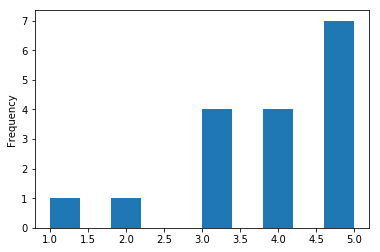

In [88]:
user = group.sort_values('Score count',ascending=False)[:1].index.get_level_values('UserId')
user = user[0]
f = data['UserId'] == user    
import matplotlib.pyplot as plt
data[f]['Score'].plot.hist()

## 3. Plot pandas Series DataFrame (Time->Date)

(array([2.890e+03, 3.246e+03, 5.080e+02, 2.800e+01, 1.621e+03, 1.193e+03,
        1.220e+02, 3.700e+02, 2.000e+01, 2.000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

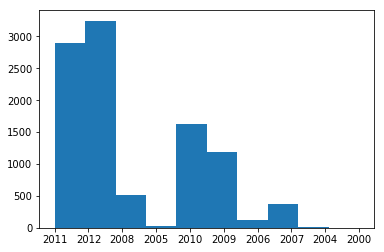

In [22]:
import datetime
year = []
for i in range(10000):
    timeStamp = data['Time'][i]
    dateArray = datetime.datetime.utcfromtimestamp(timeStamp)
    y = dateArray.strftime("%Y")
    year.append(y)
plt.hist(year)

## 4. Plot HeatMap using seaborn

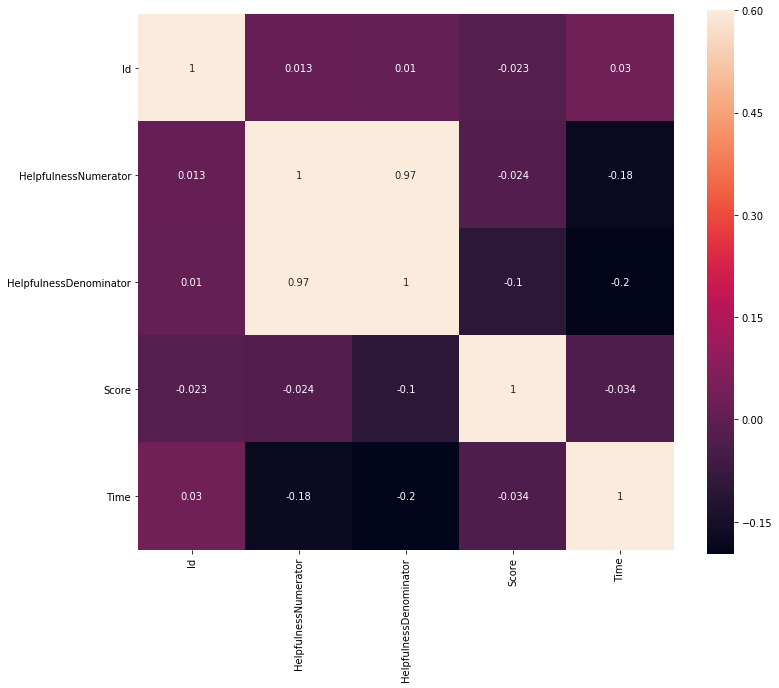

In [89]:
import seaborn as sns
plt.figure(figsize=(12,10))
ax = sns.heatmap(data[['Id', 'HelpfulnessNumerator','HelpfulnessDenominator', 'Score', 'Time']].corr(),vmax=0.6, square=True, annot=True)


## 5. Plot HeatMap using seaborn

(array([4878.,    0.,    0.,    0.,    0.,  689.,  225.,  422.,  317.,
        3469.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

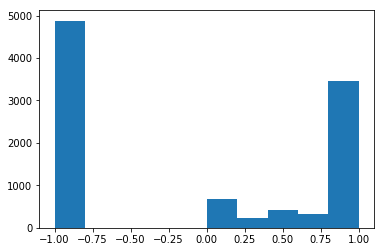

In [90]:
f = data['HelpfulnessNumerator'] <= data['HelpfulnessDenominator'] 
hp = []
for i in range(data[f].shape[0]):
    if data[f]['HelpfulnessNumerator'][i] == 0 and data[f]['HelpfulnessDenominator'][i] == 0:
        hp.append(-1)
    elif data[f]['HelpfulnessNumerator'][i] <= data[f]['HelpfulnessDenominator'][i]:
        hp.append(data[f]['HelpfulnessNumerator'][i]/data[f]['HelpfulnessDenominator'][i])
    
plt.hist(hp)



# Part2：Suicide Rates Overview 1985 to 2016

[dataset link](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016#master.csv)

## 1. Top 10 自殺人數--以國家、性別做區分

In [98]:
input_f = pd.read_csv("/home/dianarolien/Downloads/master.csv")
data = input_f[:10000]
group = data.groupby(['country','year','sex']).sum()['suicides_no']
group.name = 'Suicides_no'
group = group.reset_index()
group.set_index('year' , inplace=True)
group.sort_values('Suicides_no',ascending=False)[:10]


,country,sex,Suicides_no
year,,,
1991,Germany,male,9656
1990,Germany,male,9534
1992,Germany,male,9326
1995,Germany,male,9222
1994,Germany,male,9130
1993,Germany,male,8960
1985,France,male,8898
1986,France,male,8872
1994,France,male,8872


## 2. 每年自殺人數總和

<BarContainer object of 32 artists>

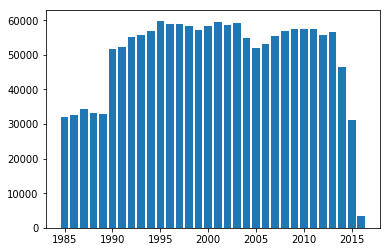

In [99]:
gp = data.groupby(['year']).sum()['suicides_no']
gp.name = 'Suicides_no'
gp = gp.reset_index()
gp.set_index('year' , inplace=True)
gp.sort_values('Suicides_no',ascending=False)
plt.bar(gp.index.get_level_values('year'), gp['Suicides_no'])

## 3. 男性：女性自殺人數比

      male_Suicides_no  female_suicides_no  suicides ratio
year                                                      
1985             23296                8592        2.711359
1986             23682                8996        2.632503
1987             25077                9207        2.723688
1988             24334                8770        2.774686
1989             24271                8641        2.808818
1990             37478               14216        2.636325
1991             38336               13985        2.741223
1992             40328               14754        2.733360
1993             41119               14600        2.816370
1994             42528               14489        2.935192
1995             44657               15198        2.938347
1996             44275               14621        3.028179
1997             44256               14600        3.031233
1998             44388               14006        3.169213
1999             43535               13635        3.1928

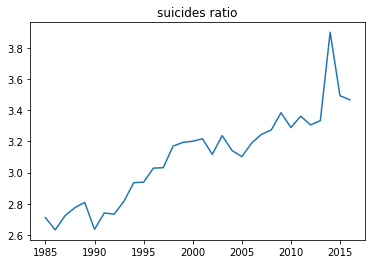

In [117]:
f = data['sex'] == 'male'
group = data[f].groupby(['year']).sum()['suicides_no']
group.name = 'male_Suicides_no'
group = group.reset_index()
group.set_index('year' , inplace=True)

f = data['sex'] == 'female'
group.insert(1,column = 'female_suicides_no',value = data[f].groupby(['year']).sum()['suicides_no'])

group.insert(2,column = 'suicides ratio',value = group['male_Suicides_no']/group['female_suicides_no'])
print(group)


plt.title('suicides ratio')
plt.plot(group.index.get_level_values('year'), group['suicides ratio'])